# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


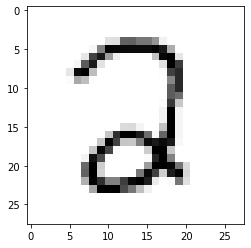

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24712088371899585
train accuracy is: 0.5755299616090803, test accuracy is 0.5836693548387096


Epoch 10 Loss 0.13924777045319073
train accuracy is: 0.8891670839592722, test accuracy is 0.8911290322580645


Epoch 20 Loss 0.072887983833272
train accuracy is: 0.9275580036721749, test accuracy is 0.9369959677419355


Epoch 30 Loss 0.05230329022347119
train accuracy is: 0.9424970789517609, test accuracy is 0.9526209677419355


Epoch 40 Loss 0.043287546556643935
train accuracy is: 0.9502587214154565, test accuracy is 0.9601814516129032


Epoch 50 Loss 0.03825455208763414
train accuracy is: 0.9554331497245869, test accuracy is 0.9606854838709677


Epoch 60 Loss 0.03497616411891621
train accuracy is: 0.9596895343014522, test accuracy is 0.9627016129032258


Epoch 70 Loss 0.03262023554326771
train accuracy is: 0.9623602069771323, test accuracy is 0.9652217741935484


Epoch 80 Loss 0.030828721497585573
train accuracy is: 0.9638624603572025, test accuracy is 0.9652217741935484


Epoch 90 Loss 0.029381955212773588
train accuracy is: 0.9653647137372726, test accuracy is 0.9652217741935484


Epoch 100 Loss 0.028189775342822125
train accuracy is: 0.9668669671173427, test accuracy is 0.9657258064516129


Epoch 110 Loss 0.02717443695852248
train accuracy is: 0.9682023034551828, test accuracy is 0.9667338709677419


Epoch 120 Loss 0.026287217920447956
train accuracy is: 0.9693707227507928, test accuracy is 0.9672379032258065


Epoch 130 Loss 0.025499019976879398
train accuracy is: 0.9704556835252879, test accuracy is 0.96875


Epoch 140 Loss 0.02478706323537838
train accuracy is: 0.9716241028208981, test accuracy is 0.9692540322580645


Epoch 150 Loss 0.024138840610547718
train accuracy is: 0.972041395426473, test accuracy is 0.969758064516129


Epoch 160 Loss 0.023544141656496445
train accuracy is: 0.9728759806376232, test accuracy is 0.969758064516129


Epoch 170 Loss 0.022990811244401083
train accuracy is: 0.9735436488065431, test accuracy is 0.9707661290322581


Epoch 180 Loss 0.02247213698933448
train accuracy is: 0.9742113169754631, test accuracy is 0.9707661290322581


Epoch 190 Loss 0.021986803128832878
train accuracy is: 0.9749624436654982, test accuracy is 0.9712701612903226


Epoch 200 Loss 0.0215196974187989
train accuracy is: 0.9756301118344183, test accuracy is 0.9717741935483871


Epoch 210 Loss 0.02107202331625456
train accuracy is: 0.9760474044399933, test accuracy is 0.9717741935483871


Epoch 220 Loss 0.02065927416688644
train accuracy is: 0.9764646970455684, test accuracy is 0.9712701612903226


Epoch 230 Loss 0.02023844270909953
train accuracy is: 0.9766316140877984, test accuracy is 0.9712701612903226


Epoch 240 Loss 0.019835687770597615
train accuracy is: 0.9769654481722584, test accuracy is 0.9717741935483871


0.004667189157087744

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23832761846661374
train accuracy is: 0.6956267734935737, test accuracy is 0.6814516129032258


Epoch 10 Loss 0.10764639873019008
train accuracy is: 0.8923385077616425, test accuracy is 0.8971774193548387


Epoch 20 Loss 0.08245900808541792
train accuracy is: 0.9194625271240193, test accuracy is 0.9284274193548387


Epoch 30 Loss 0.07051260758372956
train accuracy is: 0.9316474712068102, test accuracy is 0.9420362903225806


Epoch 40 Loss 0.0633114841575612
train accuracy is: 0.9386579869804708, test accuracy is 0.9495967741935484


Epoch 50 Loss 0.05843169633640322
train accuracy is: 0.9424136204306459, test accuracy is 0.9536290322580645


Epoch 60 Loss 0.05487224281681133
train accuracy is: 0.9455015857119012, test accuracy is 0.954133064516129


Epoch 70 Loss 0.05214022253864976
train accuracy is: 0.9475880487397763, test accuracy is 0.9566532258064516


Epoch 80 Loss 0.04996506235892137
train accuracy is: 0.9494241362043064, test accuracy is 0.9591733870967742


Epoch 90 Loss 0.048180457348130326
train accuracy is: 0.9503421799365716, test accuracy is 0.9601814516129032


Epoch 100 Loss 0.04668544577586391
train accuracy is: 0.9518444333166416, test accuracy is 0.9621975806451613


Epoch 110 Loss 0.0454071089635186
train accuracy is: 0.9537639793022867, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.04429960590562708
train accuracy is: 0.9545985645134368, test accuracy is 0.9632056451612904


Epoch 130 Loss 0.04332693415924617
train accuracy is: 0.9553496912034719, test accuracy is 0.9632056451612904


Epoch 140 Loss 0.042464866116693756
train accuracy is: 0.9559339008512769, test accuracy is 0.9647177419354839


Epoch 150 Loss 0.04169137232350617
train accuracy is: 0.956434651977967, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.04099419548662359
train accuracy is: 0.956851944583542, test accuracy is 0.9672379032258065


Epoch 170 Loss 0.040360981827178226
train accuracy is: 0.957269237189117, test accuracy is 0.9672379032258065


Epoch 180 Loss 0.03978179864562739
train accuracy is: 0.9577699883158071, test accuracy is 0.967741935483871


Epoch 190 Loss 0.0392494373594892
train accuracy is: 0.9584376564847271, test accuracy is 0.967741935483871


Epoch 200 Loss 0.038758243074199845
train accuracy is: 0.9585211150058421, test accuracy is 0.9682459677419355


Epoch 210 Loss 0.03830262718683189
train accuracy is: 0.9588549490903021, test accuracy is 0.96875


Epoch 220 Loss 0.03787820373273117
train accuracy is: 0.9591887831747622, test accuracy is 0.96875


Epoch 230 Loss 0.037481953490140746
train accuracy is: 0.9597729928225672, test accuracy is 0.96875


Epoch 240 Loss 0.03711082690997451
train accuracy is: 0.9600233683859122, test accuracy is 0.96875


0.07303166434485683

### Comparing results of NN and LR

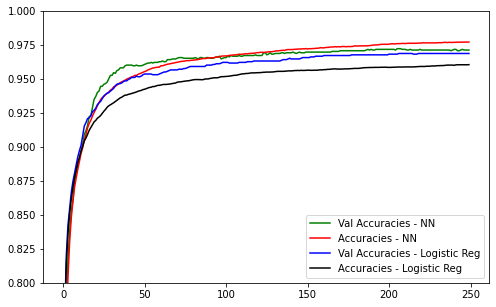

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

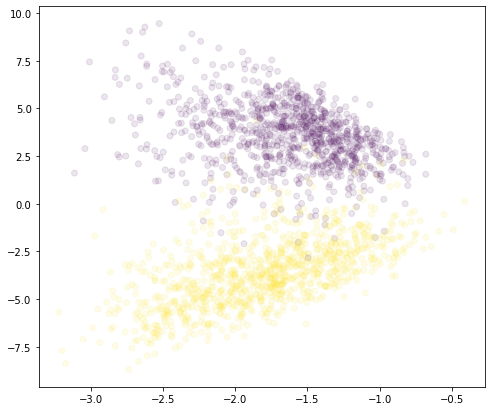

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

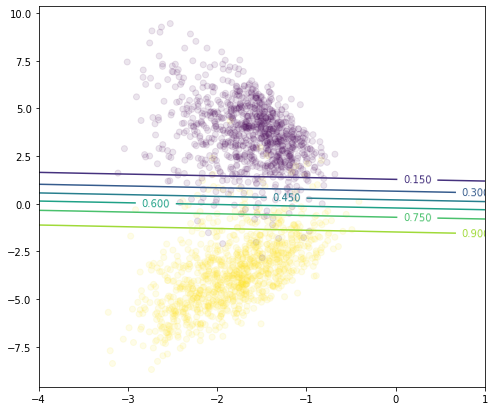

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );